In [18]:
import cmath
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-06 21:46:03,084: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
# Setup simulators
state_vector_sim = Aer.get_backend('statevector_simulator')
unitary_sim = Aer.get_backend('unitary_simulator')

# Define helper functions
def get_state_vector(circuit):
    return state_vector_sim.run(circuit).result().get_statevector()

def get_unitary_matrix(circuit):
    return execute(circuit, unitary_sim).result().get_unitary()

def get_amplitudes(matrix):
    """Can also pass in a state vector"""
    return abs(matrix)

def get_phases(matrix):
    """Can also pass in a state vector"""
    return np.angle(matrix)

# Pretty-printing
def print_matrix(matrix):
    for row in matrix:
        for num in row:
            print(f"{np.around(num, 2)}   ", end='')
        print('')
    print('\n---')
    
def print_vector(svec):
    for num in svec:
        print(np.around(num, 2))
    print('---')

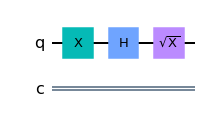

In [13]:
# Insert quantum circuit here
qasm = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[1];
creg c[1];

x q[0];
h q[0];
sx q[0];
"""
qc = QuantumCircuit.from_qasm_str(qasm)
qc.draw()

In [14]:
print('State vector')
sv = get_state_vector(qc)
print_vector(sv)

print('Unitary Matrix')
um = get_unitary_matrix(qc)
print_matrix(um)

print('Amplitudes')
amps = get_amplitudes(um)
print_matrix(amps)

print('Phases')
phases = get_phases(um)
print_matrix(phases)

State vector
0.71j
(-0-0.71j)
---
Unitary Matrix
0.71j   (0.71-0j)   
-0.71j   (0.71+0j)   

---
Amplitudes
0.71   0.71   
0.71   0.71   

---
Phases
1.57   -0.0   
-1.57   0.0   

---


In [45]:
"""
The range of np.angle is (-pi, pi]. After reaching an angle of π,
the angle measures clockwise from 1+0i (and the angle is negative).

For example, π/2 = 1.57, and 3π/2 = -1.57
"""
print('Phases Chart')
for i in range(1, 5):
    print(f'π/{i}: {np.round(np.pi/i, 2)}')

Phases Chart
π/1: 3.14
π/2: 1.57
π/3: 1.05
π/4: 0.79


In [46]:
# Examples on np.angle
cnums = [complex(0, np.pi/2), complex(0, -np.pi/2)]
print(np.angle(cnums))

[ 1.57079633 -1.57079633]
